In [1]:
#After predicting disordered residues with iupred,
#each string of contiguous disordered residues was
#saved an item in a dictionary. Likewise, there is 
#a dictionary for all ordered domains and a
#dictionary that contains the entirety of every
#proteins sequence proteome-wide. These dictionaries
#were then exported as a pickle bundle which this
#bit of code unpacks and converts to a dictinary.

import pickle as pkl

disorderdictionary = open('UP000000803DisorderDict.pkl', 'rb')
ProteomeDisorderDict = pkl.load(disorderdictionary)

orderdictionary = open('UP000000803OrderDict.pkl', 'rb')
ProteomeOrderDict = pkl.load(orderdictionary)

proteomedictionary = open('UP000000803ProteomeDict.pkl', 'rb')
ProteomeDict =  pkl.load(proteomedictionary)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import seaborn as sns
import pandas as pd

def pI_dict_analysis(idr_dict):
    #takes in a dictionary with protein sequences as values and makes a new dictionary with pI
    pI_dict = {}
    for key in idr_dict:
        if len(idr_dict[key]) >= 100:
            pI = ProteinAnalysis(idr_dict[key]).isoelectric_point()
            pI_dict[key] = pI
    return pI_dict

def nested_pI_dict_analysis(nested_dict):
    list_output = []
    for key in nested_dict:
        first_output = pI_dict_analysis(nested_dict[key])
        for name in first_output:
            list_output.append(first_output[name])
    return list_output

def dictionary_to_list(dict):
    data_points = []
    for key in dict:
        data_points.append(dict[key])
    return data_points

In [3]:
drosophila_pI_dict = pI_dict_analysis(ProteomeDict)
drosophila_pI_list = dictionary_to_list(drosophila_pI_dict)
#print(drosophila_pI_dict)

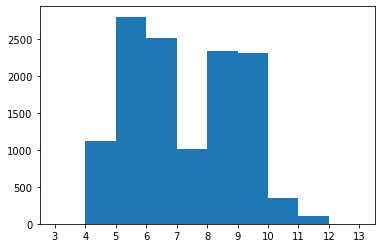

In [4]:
fig, ax = plt.subplots(1,1)

drosophila_pI_dict = pI_dict_analysis(ProteomeDict)
drosophila_pI_list = dictionary_to_list(drosophila_pI_dict)

a = np.array(drosophila_pI_list)

ax.hist(a, bins = [3,4,5,6,7,8,9,10,11,12,13])

ax.set_xticks([3,4,5,6,7,8,9,10,11,12,13])

plt.show()

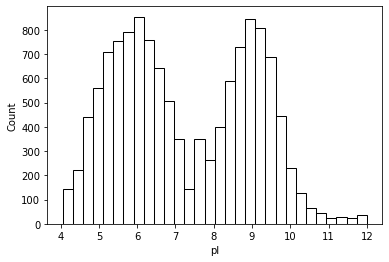

In [5]:
drosophila_pI_dataframe = pd.DataFrame({'pI': np.array(drosophila_pI_list)})
sns.histplot(data=drosophila_pI_dataframe, x='pI', stat='count', fill=False, color='black')
plt.savefig('Drosophila Proteome pI.png')

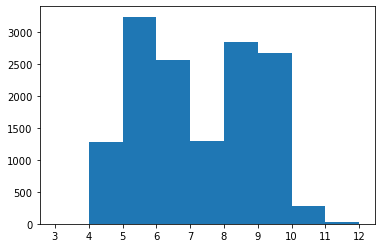

In [6]:
fig, ax = plt.subplots(1,1)

drosophila_order_pI_list = nested_pI_dict_analysis(ProteomeOrderDict)

a = np.array(drosophila_order_pI_list)

ax.hist(a, bins = [3,4,5,6,7,8,9,10,11,12])

ax.set_xticks([3,4,5,6,7,8,9,10,11,12])

plt.show()

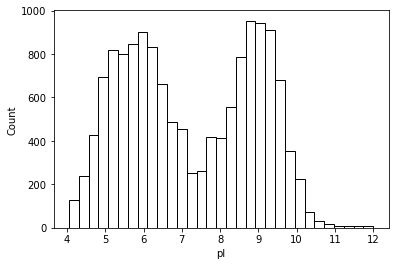

In [7]:
drosophila_order_pI_dataframe = pd.DataFrame({'pI': np.array(drosophila_order_pI_list)})
sns.histplot(data=drosophila_order_pI_dataframe, x='pI', stat='count', fill=False, color='black')
plt.savefig('Drosophila Ordered Proteome pI.png')

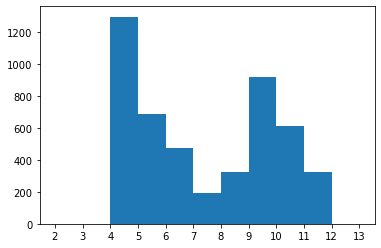

In [8]:
fig, ax = plt.subplots(1,1)

drosophila_disorder_pI_list = nested_pI_dict_analysis(ProteomeDisorderDict)

a = np.array(drosophila_disorder_pI_list)

ax.hist(a, bins = [2,3,4,5,6,7,8,9,10,11,12,13])

ax.set_xticks([2,3,4,5,6,7,8,9,10,11,12,13])

plt.show()

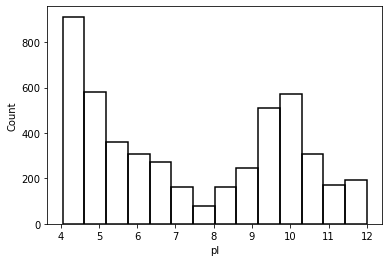

In [9]:
drosophila_disorder_pI_dataframe = pd.DataFrame({'pI': np.array(drosophila_disorder_pI_list)})
sns.histplot(data=drosophila_disorder_pI_dataframe, x='pI', stat='count', fill=False, color='black')
plt.savefig('Drosophila Disordered Proteome pI.png')

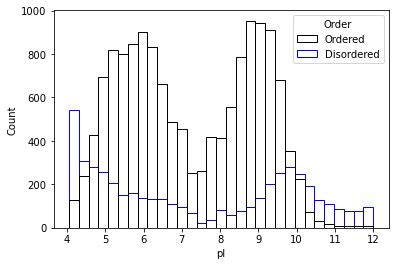

In [10]:
#stacked histogram of the orderome and discorderome

drosophila_order_pI_dataframe['Order'] = 'Ordered'
drosophila_disorder_pI_dataframe['Order'] = 'Disordered'

order_disorder = drosophila_order_pI_dataframe.append(drosophila_disorder_pI_dataframe)

sns.histplot(data=order_disorder, x='pI', hue='Order', palette={'Ordered': 'black', 'Disordered': 'blue'}, fill=False, edgecolor='black')
plt.savefig('Drosophila Ordered and Disordered Proteome pI.png')